In [6]:
import numpy as np
from statsmodels.tsa.stattools import acf

x = np.array([1, 2, 3, 4, 5])

def autocovariance(x, lag=1):
    x = np.asarray(x)
    x_mean = np.mean(x)
    n = len(x)
    return np.sum((x[lag:] - x_mean) * (x[:-lag] - x_mean)) / n

autocov = autocovariance(x, 1)
print(autocov)

acf_values = acf(x, fft=False)  # includes lag 0
print(acf_values)

from statsmodels.tsa.stattools import pacf

pacf_values = pacf(x, method='ols')  # or method='ywunbiased'
print(pacf_values)



0.8
[ 1.   0.4 -0.1 -0.4 -0.4]
[1. 1.]


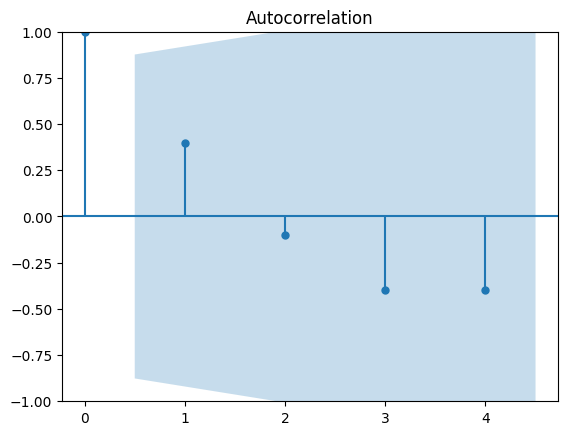

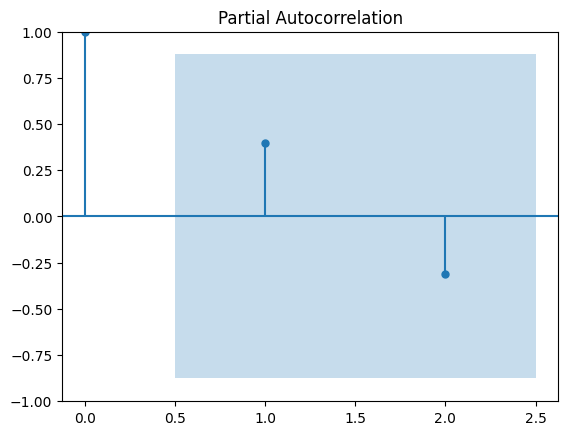

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(x, lags=4)
plot_pacf(x, lags=2)
plt.show()

In [8]:
# moving average process

from statsmodels.tsa.arima.model import ARIMA

ma_model = ARIMA(x, order=(0,0,1))  # (p,d,q) = (0,0,1) p = autoregressive, d = differencing, q = moving average
ma_fit = ma_model.fit()

ar_model = ARIMA(x, order=(1,0,0))  # (p,d,q) = (0,0,1) p = autoregressive, d = differencing, q = moving average
ar_fit = ar_model.fit()

# print(ma_fit.summary())

/Users/willneuner/Desktop/FINTECH545/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [9]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Simulate or load returns
np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n)  # replace with your returns series

# Fit GARCH(1,1)
model = arch_model(returns, vol='Garch', p=1, q=1, mean='Zero', dist='normal')
res = model.fit()

print(res.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 4490.218553629945
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1397.6205520819544
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1397.6100455024816
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1488.3469031934092
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1473.9579641964615
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1462.4742338893898
Iteration:      7,   Func. Count:     36,   Neg. LLF: 1403.6706809696248
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1500.355829771078
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1397.566690671044
Iteration:     10,   Func. Count:     53,   Neg. LLF: 1400.6663901138377
Iteration:     11,   Func. Count:     58,   Neg. LLF: 1399.6558997871841
Iteration:     12,   Func. Count:     63,   Neg. LLF: 1401.356528858428
Iteration:     13,   Func. Count:     68,   Neg. LLF: 1397.4714062614516
Iteration:     14,   Func. Count:     72,   Neg. LLF: 5